In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image

In [2]:
print(tf.config.list_physical_devices('GPU'))
print("GPU:", len(tf.config.list_physical_devices('GPU')))
print("Tensorflow Version", tf.__version__)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU: 1
Tensorflow Version 2.6.0


In [3]:
batch_size = 32
img_height = 224
img_width = 224

In [4]:
data_dir = r"D:\Project\aug_data\paper_data_aug"

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2519 files belonging to 5 classes.
Using 2016 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2519 files belonging to 5 classes.
Using 503 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Amanita citrina', 'Amanita muscaria', 'Amanita pantherina', 'Amanita rubescens', 'Apioperdon pyriforme']


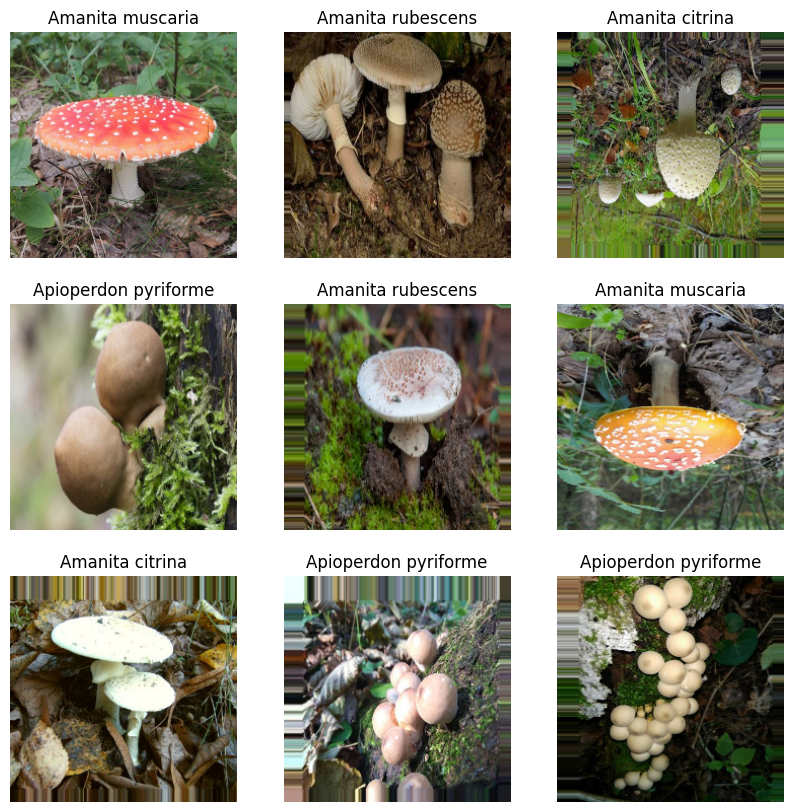

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [10]:
model = models.Sequential()

model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='vgg16'))
model.add(Flatten(name='flatten'))
model.add(Dense(256, activation='relu', name='fc1'))
model.add(Dense(128, activation='relu', name='fc2'))
model.add(Dense(5, activation='softmax', name='output'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [12]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [13]:
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [14]:
history = model.fit(train_ds, epochs=30, 
                    validation_data=val_ds)

Epoch 1/30
63/63 [==============================] - 69s 576ms/step - loss: 1.5863 - accuracy: 0.2555 - val_loss: 1.4892 - val_accuracy: 0.3360
Epoch 2/30
63/63 [==============================] - 33s 518ms/step - loss: 1.3526 - accuracy: 0.4097 - val_loss: 1.3118 - val_accuracy: 0.4493
Epoch 3/30
63/63 [==============================] - 33s 516ms/step - loss: 1.1142 - accuracy: 0.5238 - val_loss: 1.2104 - val_accuracy: 0.4592
Epoch 4/30
63/63 [==============================] - 33s 516ms/step - loss: 0.9802 - accuracy: 0.5913 - val_loss: 0.8231 - val_accuracy: 0.6541
Epoch 5/30
63/63 [==============================] - 33s 518ms/step - loss: 0.9836 - accuracy: 0.5903 - val_loss: 0.8980 - val_accuracy: 0.6044
Epoch 6/30
63/63 [==============================] - 33s 521ms/step - loss: 0.8021 - accuracy: 0.6781 - val_loss: 0.7272 - val_accuracy: 0.7157
Epoch 7/30
63/63 [==============================] - 33s 522ms/step - loss: 0.6916 - accuracy: 0.7312 - val_loss: 0.7507 - val_accuracy: 0.7117

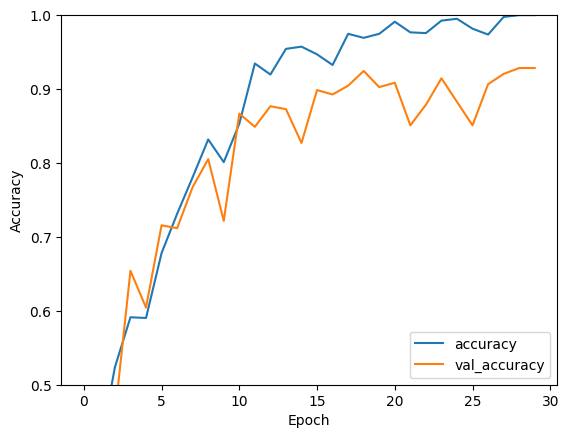

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

16/16 - 3s - loss: 0.4570 - accuracy: 0.9284


In [17]:
print(test_acc)

0.9284294247627258


In [1]:
import nbformat as nbf
import shutil

# Load the original notebook
original_nb = nbf.read('VGG_30_SGD.ipynb', as_version=4)

# Create a copy of the notebook
shutil.copy('VGG_30_SGD.ipynb', 'VGG_40_SGD.ipynb')

'VGG_40_SGD.ipynb'

In [ ]:
os._exit(00)